In [1]:
#https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import matplotlib.pyplot as plt

data = pd.read_csv('sentiment.csv')
# Keeping only the neccessary columns
data = data['text']

In [56]:
n_samples = 13871

In [57]:
len(data)

13871

In [58]:
#perform doc2vec embeddings on comments with gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [59]:
sample_data = data[:n_samples]

In [60]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [96]:
max_epochs = 10
vec_size = 50
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 Model Saved


In [62]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("hello how are you".lower())
v1 = model.infer_vector(test_data)
print("inferred docvector for 'hello how are you': ", v1)

print("most similar docvectors to '1': ",model.dv.most_similar('1'))

print("docvector of '1': ",model.dv['1'])

inferred docvector for 'hello how are you':  [ 0.15306272  0.04683937  0.0303233   0.06889656 -0.0196338   0.17928438
  0.20053098  0.0880696  -0.21287975  0.16005585  0.068296   -0.21813998
  0.36207515  0.2407447  -0.00762105  0.23513116  0.31175914 -0.17793491
 -0.27859813 -0.14852746]
most similar docvectors to '1':  [('1030', 0.9598687887191772), ('355', 0.8109568953514099), ('2854', 0.7954351902008057), ('5905', 0.7889015078544617), ('6406', 0.7816529870033264), ('9609', 0.7770174741744995), ('6797', 0.7677004933357239), ('1458', 0.7618052959442139), ('5053', 0.7554271817207336), ('6092', 0.7531613707542419)]
docvector of '1':  [-1.8873078e+00 -8.2879704e-01  6.0113117e-02 -2.3366506e+00
 -3.1338842e+00  3.3010393e-01  4.9886494e+00  1.1713218e+01
 -9.0411770e-01  2.0639763e+00 -5.2310052e+00 -3.3330686e+00
  2.6843388e+00 -5.3207569e+00  3.0214217e+00  6.3674030e+00
 -5.7268916e-03 -5.5081625e+00 -8.6432487e-01 -7.9880252e+00]


In [63]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [64]:
list(doc_vectors.values())[0]

array([ 0.41620526,  0.18795732,  0.14880636,  0.19775915, -0.42183653,
        0.2822155 ,  0.5468126 ,  0.6115415 , -0.6233087 ,  0.46787608,
        0.12753703, -0.76133126,  1.1089032 ,  0.9351465 ,  0.15954177,
        0.41947845,  0.65582764, -0.6538014 , -0.43390507, -0.2874219 ],
      dtype=float32)

In [12]:
#perform k-means clustering on embedded documents

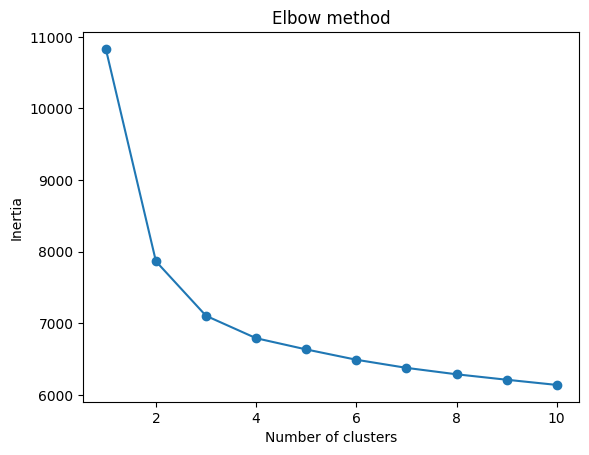

In [65]:
from sklearn.cluster import KMeans

data = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [66]:
num_clusters = 5
cluster_indices = [i for i in range(num_clusters)]

In [67]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

KMeans(n_clusters=5)

In [16]:
#find centroids. compute bigram closest to centroid

In [68]:
centroids  = kmeans.cluster_centers_; centroids

array([[ 0.39636991,  0.47529634, -0.00284829,  0.306054  , -0.33051585,
         0.29428713,  0.65393817,  0.45503745, -0.81191492,  0.62991155,
         0.13766879, -0.87153743,  1.28095044,  1.13054901,  0.28838535,
         0.53395627,  1.02588293, -0.67865424, -0.54341357, -0.68567796],
       [ 0.27821278,  0.39226303,  0.02486495,  0.29021619, -0.24500415,
         0.20813174,  0.52311172,  0.41382409, -0.64792631,  0.51908784,
         0.14297359, -0.69996773,  1.0793499 ,  0.93961416,  0.26844625,
         0.47635326,  0.83652929, -0.52376859, -0.49379472, -0.56142573],
       [ 0.07593413,  0.11537846,  0.02074161,  0.09660234, -0.09025795,
         0.08945807,  0.17306475,  0.14413337, -0.20440939,  0.17793283,
         0.03990813, -0.23648814,  0.34448038,  0.29288298,  0.09235546,
         0.13335188,  0.28022914, -0.1581877 , -0.17049306, -0.171806  ],
       [ 0.22296545,  0.31443377,  0.04789909,  0.22416077, -0.21165676,
         0.19526089,  0.42699824,  0.34550898, -

In [69]:
#compute distances between centroids
centroid_dists = sum([[np.linalg.norm(centroids[i]-centroids[j]) for j in range(i+1,num_clusters)] for i in range(num_clusters)],[]); centroid_dists

[0.5316217111959901,
 2.16748923310156,
 0.9926672373114113,
 1.508045635207708,
 1.653272437075267,
 0.47390271021584873,
 0.9910043194924615,
 1.1833483864379066,
 0.6635777443820428,
 0.5208678705802163]

In [70]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(list(doc_vectors.values()))
explained_variance = pca.explained_variance_ratio_

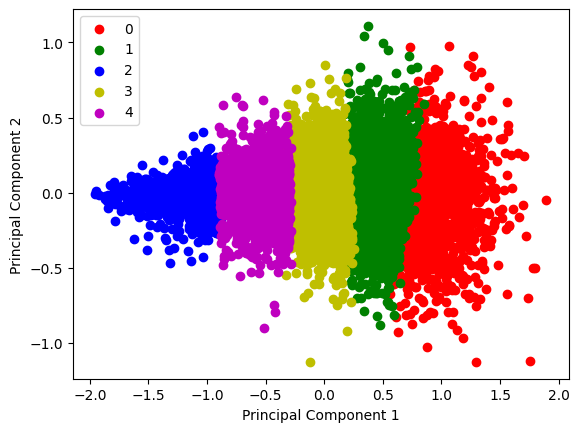

In [74]:
# plot the first two principal components with labels
pca_labeled = list(zip(pca_fit,kmeans.labels_))
colors = ["r", "g", "b", "y","m"]
for index, color in zip(cluster_indices, colors):
    pca_fit_cluster = [pt[0] for pt in pca_labeled if pt[1] == index]
    pca_fit_i_x = np.array(pca_fit_cluster).transpose()[0]
    pca_fit_i_y = np.array(pca_fit_cluster).transpose()[1]
    plt.scatter(pca_fit_i_x, pca_fit_i_y, color=color, label=index)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [75]:
#a selection of poliical words 
political_keywords = list(pd.read_csv("political_keywords.csv"))

In [76]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_keywords)):
    for j in range(i+1,len(political_keywords)):
        bigrams.append(political_keywords[i] + " " + political_keywords[j])

In [77]:
#get a list of political bigrams directly
political_bigrams = list(pd.read_csv("political_bigrams.csv"))

In [78]:
political_bigrams[:10]

['economic policy',
 'foreign affairs',
 'national security',
 'civil rights',
 'social justice',
 'tax reform',
 'health care',
 'immigration law',
 'gun control',
 'climate change']

In [79]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in political_bigrams}

In [80]:
list(bigram_vecs.values())[0]

array([ 0.14678591,  0.06698333,  0.02133169,  0.05157254, -0.06522609,
        0.05709909,  0.11328885,  0.04903488, -0.13958502,  0.14870656,
        0.01338991, -0.09990714,  0.24138546,  0.23229985,  0.01486023,
        0.1143151 ,  0.11765914, -0.06758172, -0.11305035, -0.13422793],
      dtype=float32)

In [81]:
#define cosine similarity
from numpy.linalg import norm
def similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [94]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2**32
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        #dist = similarity(centroid, embedding)
        dist = np.linalg.norm(centroid - embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,min_dist))

In [95]:
nearest_bigram_to_centroid

[('public policy', 2.023387427965093),
 ('public policy', 1.5111607455439988),
 ('middle class', 0.1416597512898347),
 ('public policy', 1.04615640138731),
 ('public policy', 0.5395000574573788)]

In [88]:
for comment in sample_data[:10]:
    print(comment)

RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate
RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…
RT @TJMShow: No mention of Tamir Rice and the #GOPDebate was held in Cleveland? Wow.
RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …
RT @DanScavino: #GOPDebate w/ @realDonaldTrump delivered the highest ratings in the history of presidential debates. #Trump2016 http://t.co…
RT @GregAbbott_TX: @TedCruz: "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews
RT @warriorwoman91: I liked her and was happy when I heard she was going to be the moderator. Not anymore. #GOPDebate @megynkelly  https://…
Going on #MSNBC Live with @ThomasARoberts around 2 PM ET.  #GOPDebate
Deer in the headlights RT @lizzwinstea

In [29]:
#label the data with the appropriate label from k-means clustering
labeled_data = list(zip(sample_data,kmeans.labels_))

In [30]:
#separate documents by label. build vocabulary for each cluster
cluster_vocab = [[] for label in cluster_indices]
cluster_docs = [[] for label in cluster_indices]
for doc, label in labeled_data:
    cluster_vocab[label] += word_tokenize(doc.lower())
    cluster_docs[label].append(doc)

In [123]:
#METHOD 2) use word embeddings to compute distance from word to list of words, take closest words

In [31]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [32]:
nlp("hello").similarity(nlp("hi"))

0.5797264417406982

In [33]:
#define function which measures distance to a set of words using word embeddings and cosine similarity
def dist_to_wordset(keyword,wordset):
    return min([nlp(keyword).similarity(nlp(word)) for word in wordset])

In [34]:
dist_to_wordset(political_keywords[0],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_17452/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


-0.2748392664312949

In [38]:
#compute the political keyword with the closest distance
#this is essentially computing the Hausdorff distance between these two sets
def closest_keyword(keywords,wordset):
    max_dist = -2
    max_keyword = ""
    for keyword in keywords:
        dist = dist_to_wordset(keyword,wordset)
        if dist > max_dist:
            max_dist = dist
            max_keyword = keyword
    return (max_keyword,max_dist)

In [39]:
closest_keyword(political_keywords[:3],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_2309/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


('republic', -0.2577690642582492)

In [35]:
#METHOD 3: Use TF-IDF on each cluster to extract top two words
from sklearn.feature_extraction.text import TfidfVectorizer
def top_words_in_cluster(cluster_index,num_words=10):
    tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word',stop_words='english')
    corpus_tfidf = tfidf_vectorizer.fit_transform(cluster_docs[cluster_index])
    tfidf_df = pd.DataFrame(corpus_tfidf.toarray(), columns = tfidf_vectorizer.get_feature_names_out())
    tfidf_scores = tfidf_df.sum(axis=0)
    return tfidf_scores.nlargest(n=num_words)

In [37]:
top_words_in_cluster(0)

http               20.486685
https               8.817792
trump               7.374561
night               6.819720
realdonaldtrump     4.549463
debate              4.495866
like                4.294735
megynkelly          3.936301
tcot                3.930416
gop                 3.620411
dtype: float64